# Fit the complete data (With sWeights and without sWeights)
This file is fitting for different cuts on the BDT variable

- Fit on $m(B^0_s)$ with $m(3\pi)$ around $m(D_s)$ and sWeights
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (gaussian)
    - Background of partially reconstructed decays (gaussian)
    - Combinatorial background (exponential)
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (sum of two Crystall ball PDF)
    - Background $B^0 \to D^{*-} D_s^+$ from the other fit of the simultaneous fit
    - Background with a misidentified pion: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$ (sum of two crystall ball PDF)
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$ (gaussian)
    - Combinatorial background (exponential)
    
    The ratio of yield $\frac{n_{B^0 \to D^{*-} K^+ \pi^+ \pi^-}}{n_{B^0 \to D^{*-} \pi^+ \pi^+ \pi^-}}$is fixed at the value found without any cut on the `BDT` output.

Those two fits are not simultaneous

**Computation of the number of events below the peak.**

We define $\sigma_L$ and $\sigma_R$, the standard deviation of the Crystall ball signal PDFs obtained with the full `common` with only the $143\ MeV < \Delta M < 148\ MeV$ cut.
`frac`, noted $f$, is such that the total signal shape is $f_S = f_r\times p_L +(1-f) p_R$, where $p_L$ ($p_R$) is the left (right) Crystal ball PDF, with standard deviation $\sigma_L$ ($\sigma_R$).
The common mean of the two Crystal Ball PDF is denoted $\mu$

Then, we define the geometrical average $\sigma=\sqrt{(f\sigma_L)^2+((1-f)\sigma_R)^2}$ and the usual average $\sigma_2 = f\times \sigma_L + (1-f) \sigma_R$

The number of combinatorial background under the signal peak, for a given `cut_BDT` is noted `n_B` and computed by:
$$ n_B=\int_{\mu-3\sigma}^{{\mu+3\sigma}}{dx f_e(x, \lambda_{BDT})} \times n_{B,c} $$
Where $n_{B,c}$ is the number of background events between `low` and `high` where the fit is applied. $f_e$ is the exponential combinatorial background PDF.
We also compute this quantity for $\sigma_2$, denoted  $n_{B2}$ or `n_B2`.

Those two quantities and their errors are computed and saved together with the fitted parameters.

Finally, after comparison, I'll chose $\sigma_2$ for the optimisation.

## Import

In [1]:
import zfit
import json
import numpy as np
import timeit

from math import sqrt

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle, format_previous_params, sum_crystalball

Welcome to JupyROOT 6.22/02


## Load

In [4]:
# Mean of the distribution of the partially reconstructed data
with open(f'{loc.JSON}/data_strip_p/all_data_strip_params.json', 'r') as f:
    mu2_p = json.load(f)['mu2']

In [5]:
df_common = fct.load_data(years, magnets, type_data='common', vars=['B0_M', 'BDT'],
                            cut_DeltaM=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/all_common.root


In [6]:
name_data = 'common_cutDeltaM_V8_rFixed'
name_data_B0Ds = 'common_cutDeltaM_Ds_recomp_weighted_V8'

Loading of $\sigma_R$, $\sigma_L$, `frac` and $\mu$ of the signal shape, of the `common` data.
Those values will be used to integrate the combinatorial PDF in order to get the number of background under the signal peak.

In [7]:
name_full_common = "all_common_cutDeltaM_V8_fixedTails"
with open(f'{loc.JSON}/{name_full_common}_params.json', 'r') as f:
    common_params = json.load(f)


sigmaR = common_params['sigmaR']
sigmaL = common_params['sigmaL']
frac = common_params['frac']
sigm = sqrt((frac*sigmaL)**2 + ((1 - frac)*sigmaR)**2)
sigm2 = frac*sigmaL + (1 - frac)*sigmaR
mea = common_params['mu']
r_bkgK = common_params['r_bkgK']
print('sigm', sigm)
print('sigm2', sigm2)
print('r_bkgK', r_bkgK)

sigm 14.623778731824565
sigm2 18.568495396578285
r_bkgK 0.032785384091824694


## BDT cuts

Reference fit whose results are taken as the starting values of the new fit. It is specified by cut_BDT_ref, the cut on the BDT output. If None, the reference fit is the one performed without any cut on the BDT output.

In [17]:
l_BDT = []
l_BDT_ref = []
#starting_value = -0.4
starting_value = 0.2
end_value      =  0.4
step           = 0.025


value = starting_value
while value != end_value:
    if round(value%0.05, 3) != 0: # value not a multiple of 0.05
        if value==0:
            value = 0
        l_BDT.append(value)
    
        if value <= -0.2:
            l_BDT_ref.append(None)
        else:
            BDT_ref = np.round(l_BDT[-1]-0.025,4)
            if BDT_ref==0:
                BDT_ref=0
            l_BDT_ref.append(BDT_ref)
    
    value = np.round(value + step, 3)

## Range of the variables

### Weighted `B0_M` with `|tau_M-1969|<50`

In [18]:
low_B0Ds = 5150.
high_B0Ds = 5360.

### full `B0_M`

In [19]:
low = 5150.
high = 5550.

## LOOP

================================ cut_BDT = 0.225 ================================
cut_BDT_ref = 0.2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.225.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


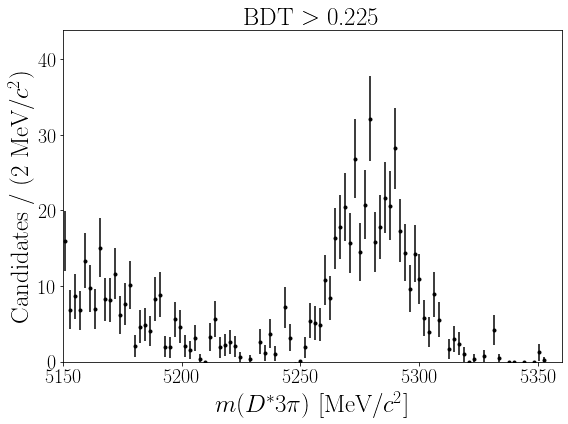

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.225.pdf
------------------------------------------------------------------
| FCN = -414.5                  |     Ncalls=196 (196 total)     |
| EDM = 0.000225 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                    value    minuit_hesse    at limit
--------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.225     409.1     +/-      16       False
n_bkg2_B0Ds|BDT0.225    211.5     +/-      16       False
mu_B0Ds|BDT0.225         5281     +/-     1.3       False
sigma_B0Ds|BDT0.225     14.71     +/-       1       False
sigma2_B0Ds|BDT0.225    59.24     +/-     5.8       False
------------------------------------------------------------------
| FCN = -414.5                  |      Ncalls=70 (70 total)      |
| EDM = 2.27e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


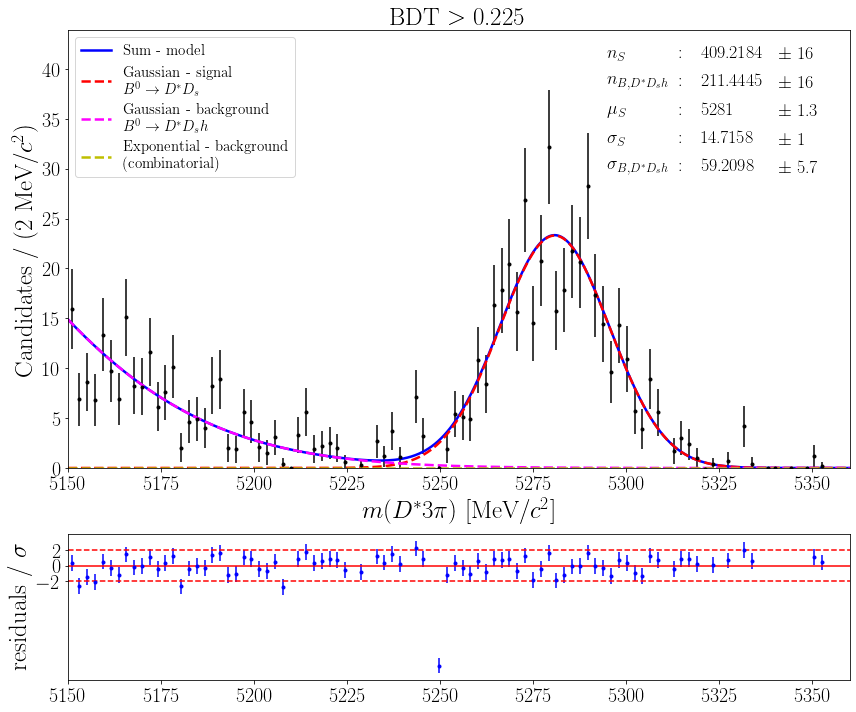

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.225.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


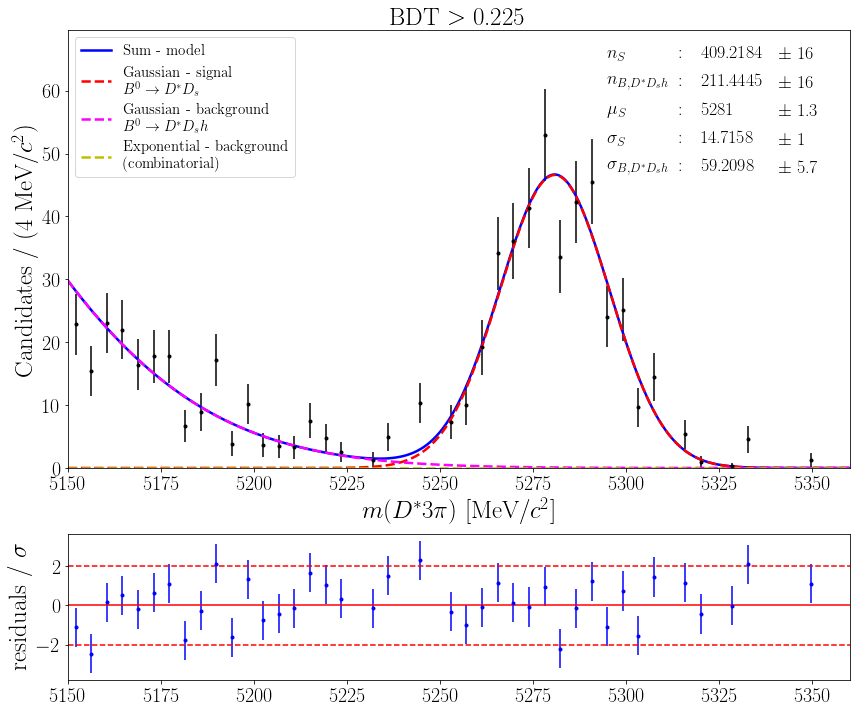

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.225.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.225_params.json


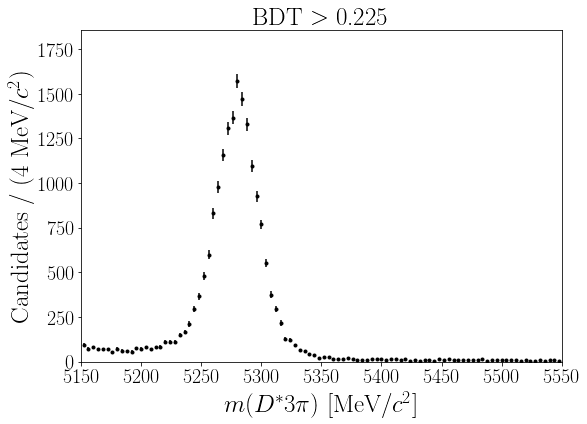

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.225.pdf
------------------------------------------------------------------
| FCN = -7.738e+04              |     Ncalls=298 (298 total)     |
| EDM = 0.000664 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                 value    minuit_hesse    at limit
---------------  ---------  --------------  

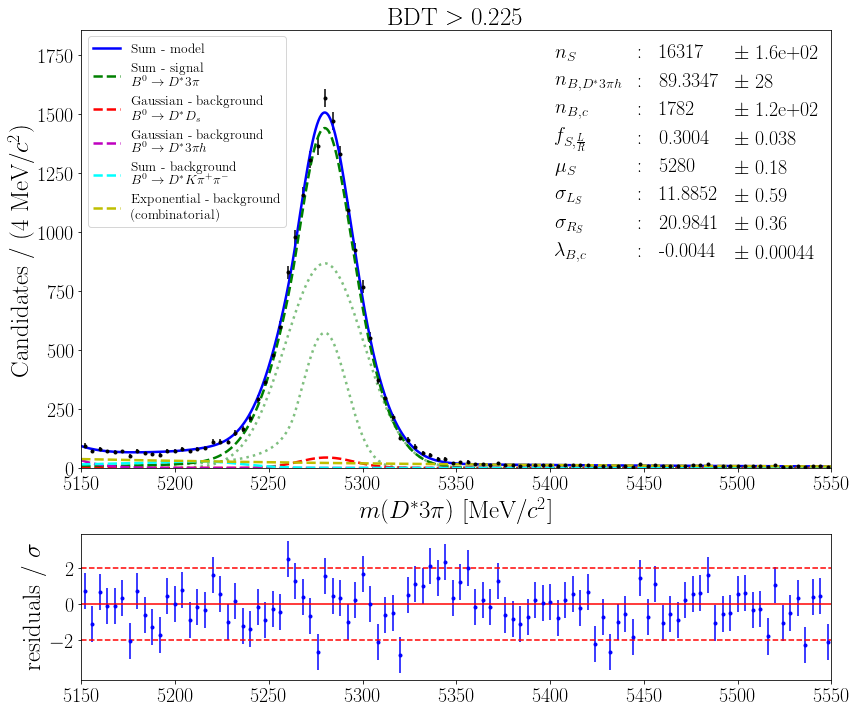

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.225.pdf


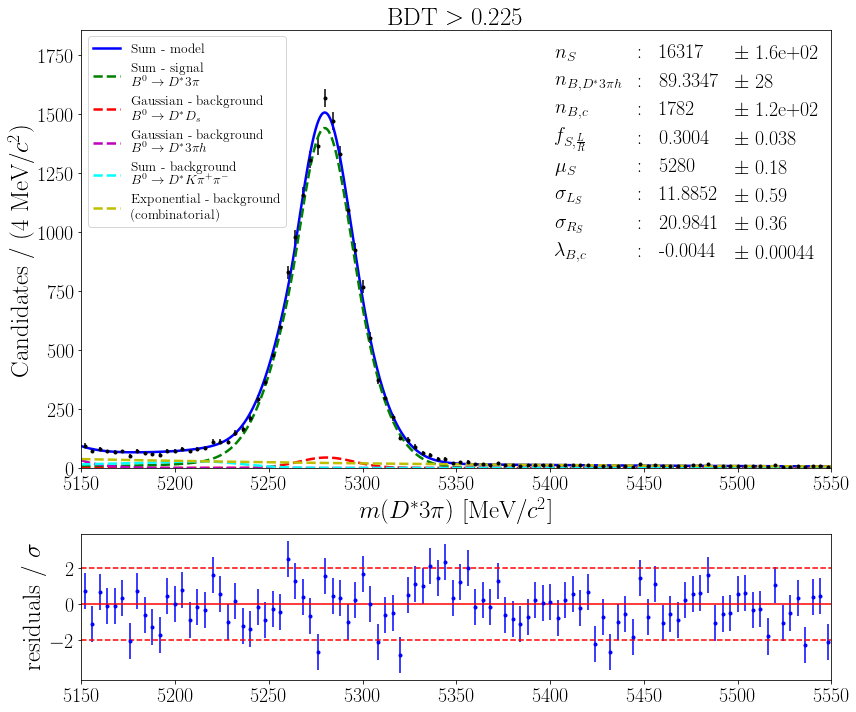

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.225.pdf
472.3563925807775 602.0385697923401
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.225_params.json
================================ cut_BDT = 0.25 ================================
cut_BDT_ref = 0.225
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.25.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


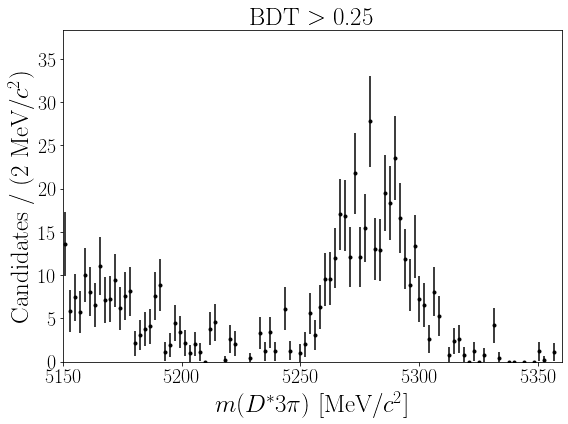

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.25.pdf
------------------------------------------------------------------
| FCN = -243.5                  |     Ncalls=283 (283 total)     |
| EDM = 1.41e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                   value    minuit_hesse    at limit
-------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.25     349.1     +/-      16       False
n_bkg2_B0Ds|BDT0.25    180.9     +/-      16       False
mu_B0Ds|BDT0.25         5281     +/-     1.4       False
sigma_B0Ds|BDT0.25     15.28     +/-     1.2       False
sigma2_B0Ds|BDT0.25    63.89     +/-     8.1       False
------------------------------------------------------------------
| FCN = -243.5                  |      Ncalls=63 (63 total)      |
| EDM = 1.17e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


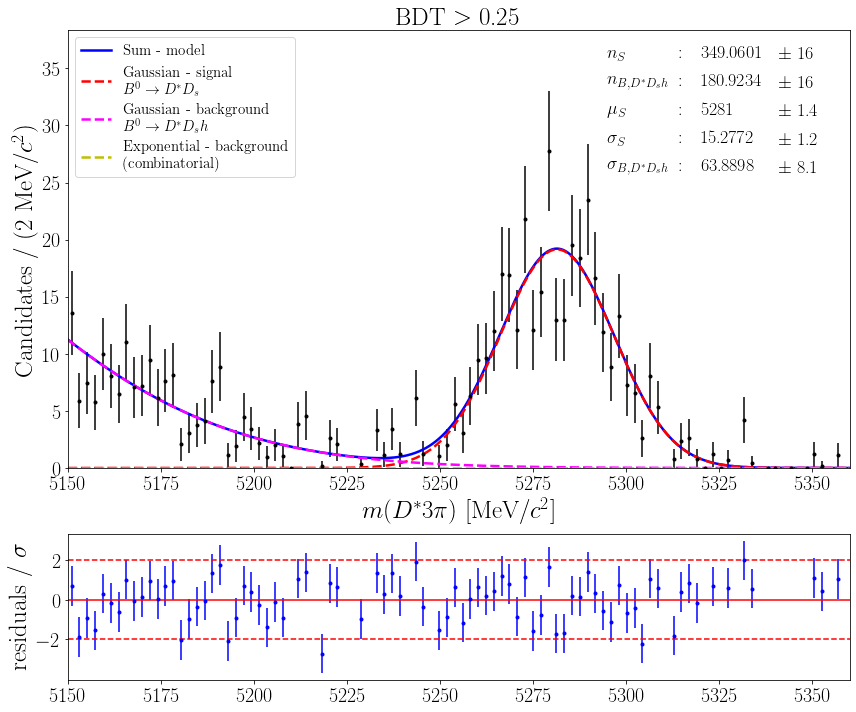

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.25.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


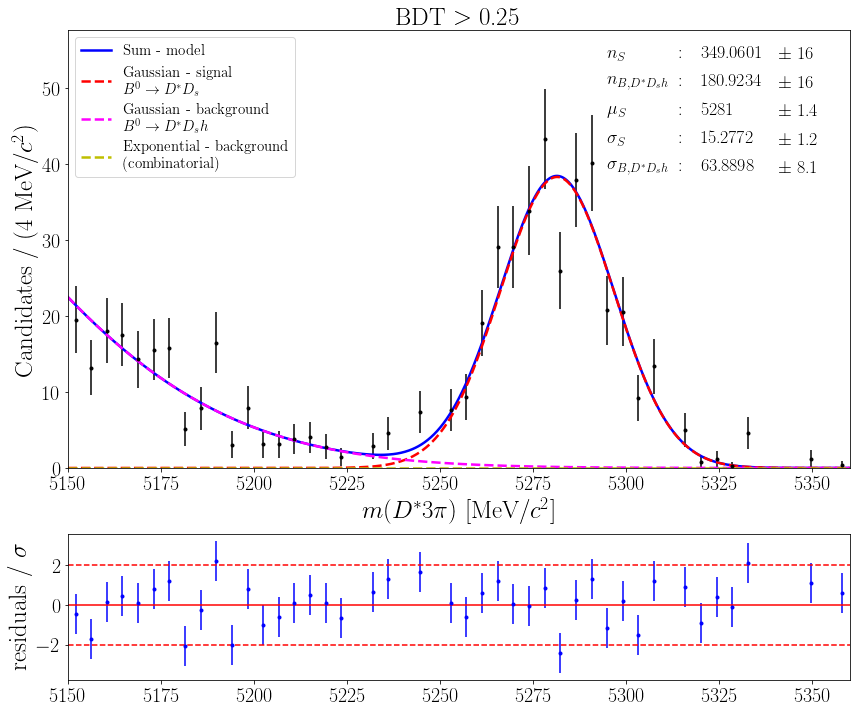

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.25.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.25_params.json


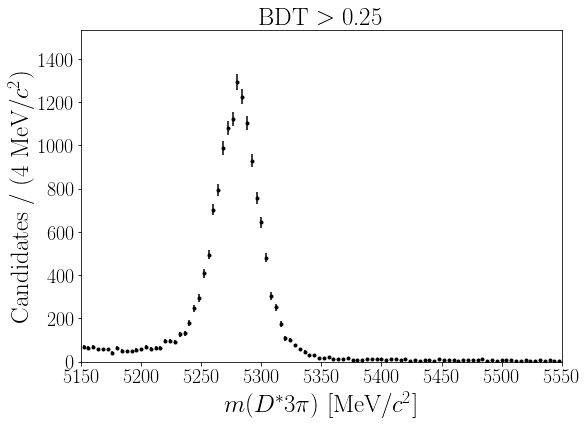

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.25.pdf
------------------------------------------------------------------
| FCN = -6.138e+04              |     Ncalls=285 (285 total)     |
| EDM = 0.000927 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name               value    minuit_hesse    at limit
--------------  --------  --------------  -----

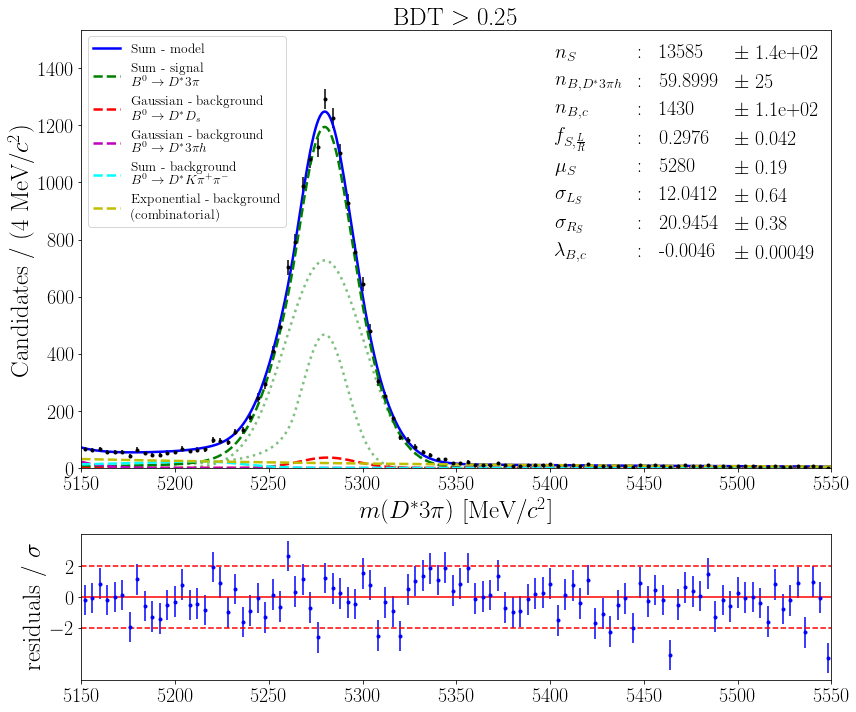

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.25.pdf


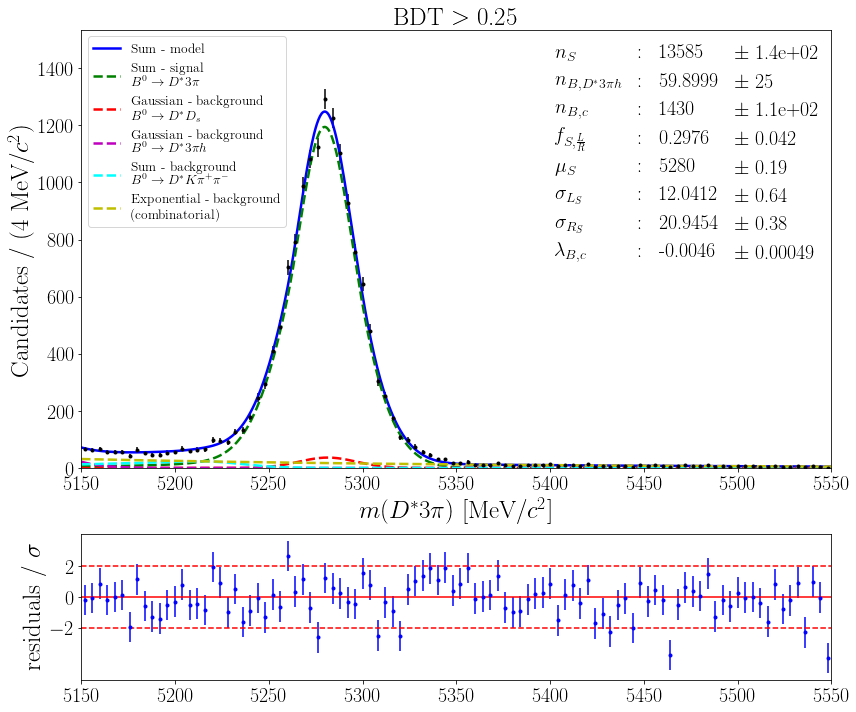

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.25.pdf
380.52252605907245 485.1908787998465
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.25_params.json
================================ cut_BDT = 0.275 ================================
cut_BDT_ref = 0.25
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.275.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


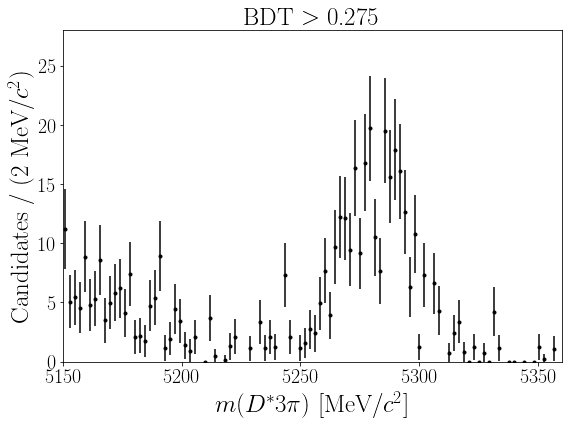

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.275.pdf
------------------------------------------------------------------
| FCN = -82.95                  |     Ncalls=176 (176 total)     |
| EDM = 9.69e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                    value    minuit_hesse    at limit
--------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.275     280.3     +/-      15       False
n_bkg2_B0Ds|BDT0.275    140.7     +/-      15       False
mu_B0Ds|BDT0.275         5282     +/-     1.7       False
sigma_B0Ds|BDT0.275     16.24     +/-     1.6       False
sigma2_B0Ds|BDT0.275    64.53     +/-     8.9       False
------------------------------------------------------------------
| FCN = -82.95                  |      Ncalls=74 (74 total)      |
| EDM = 3.17e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


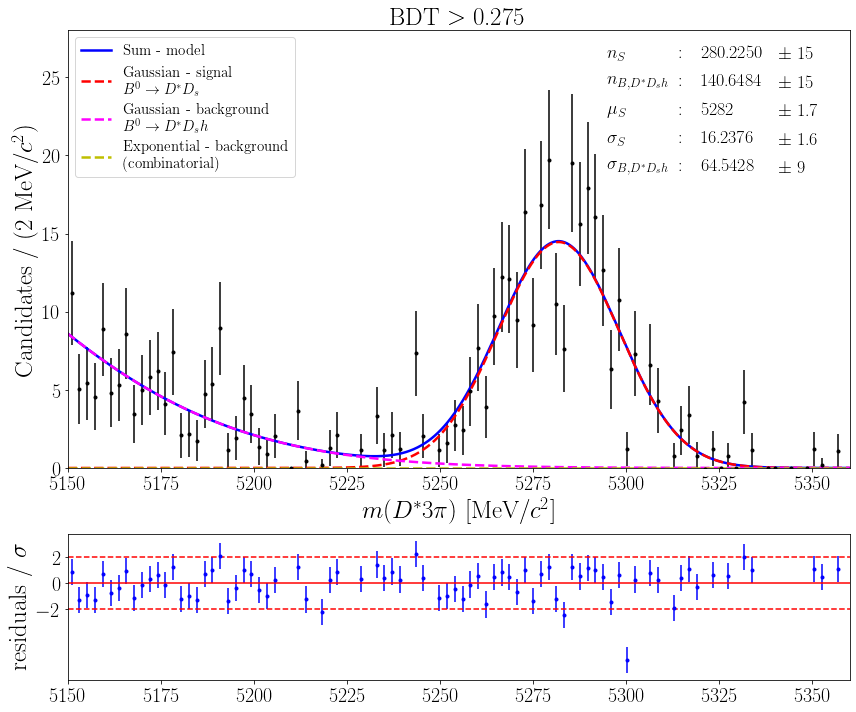

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.275.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


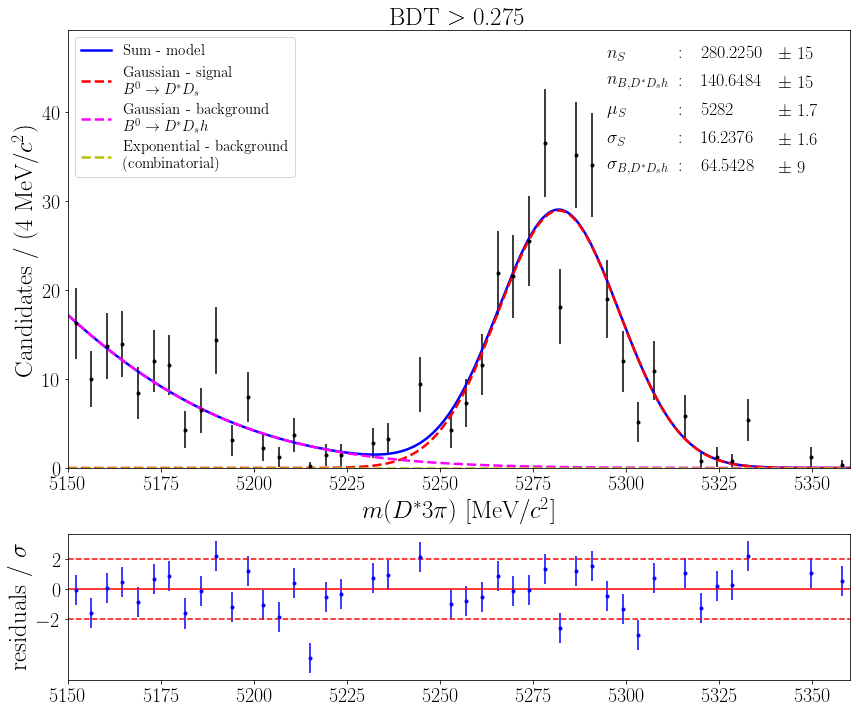

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.275.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.275_params.json


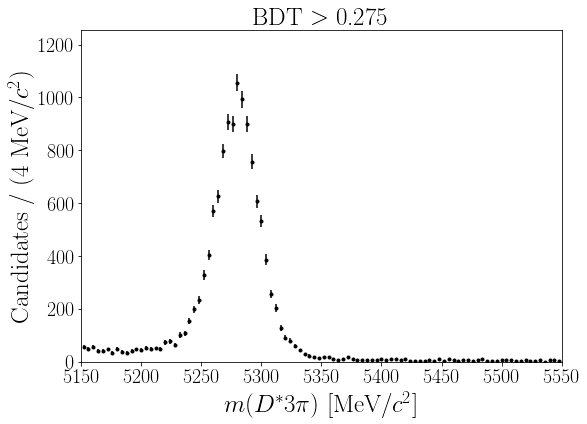

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.275.pdf
------------------------------------------------------------------
| FCN = -4.694e+04              |     Ncalls=306 (306 total)     |
| EDM = 2.13e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                 value    minuit_hesse    at limit
---------------  ---------  --------------  

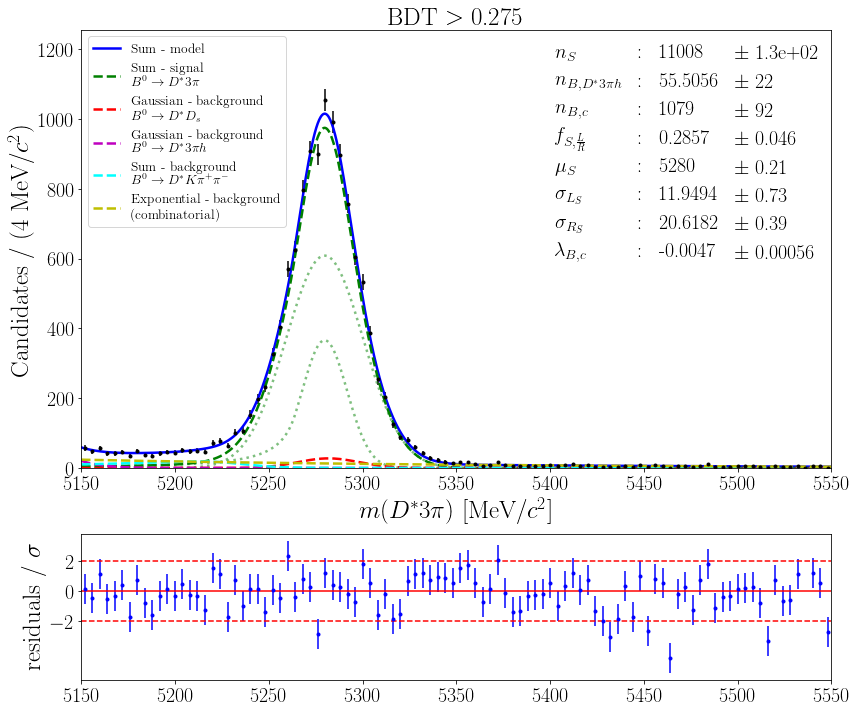

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.275.pdf


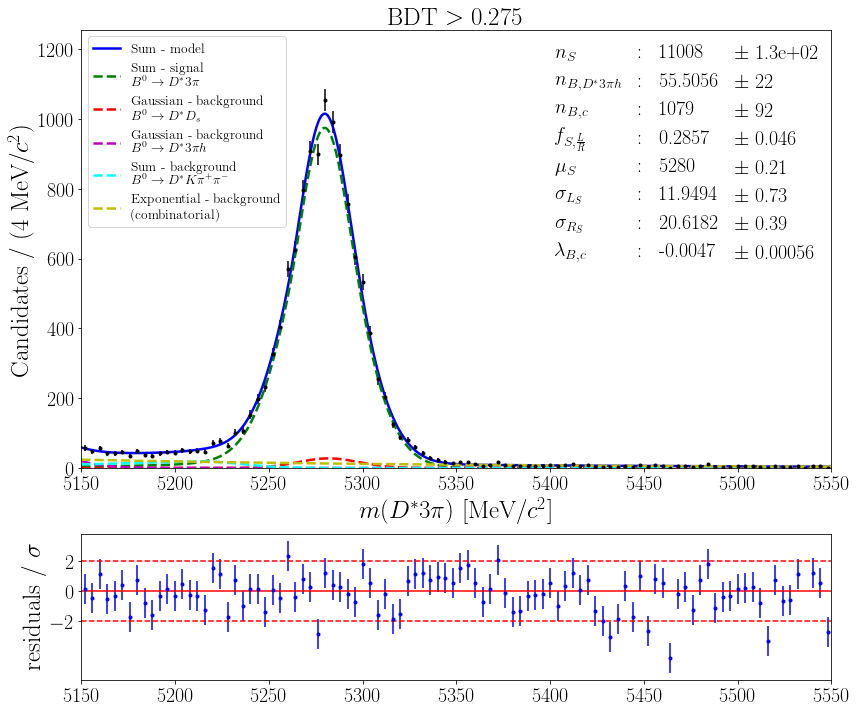

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.275.pdf
287.2232961210604 366.25601513178015
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.275_params.json
================================ cut_BDT = 0.3 ================================
cut_BDT_ref = 0.275
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.3.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


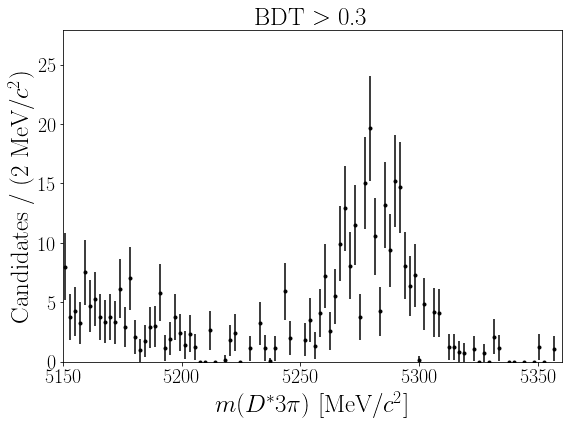

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.3.pdf
------------------------------------------------------------------
| FCN = 7.049                   |     Ncalls=185 (185 total)     |
| EDM = 6.65e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                  value    minuit_hesse    at limit
------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.3     211.8     +/-      13       False
n_bkg2_B0Ds|BDT0.3    111.7     +/-      13       False
mu_B0Ds|BDT0.3         5281     +/-     1.8       False
sigma_B0Ds|BDT0.3     14.68     +/-     1.4       False
sigma2_B0Ds|BDT0.3    66.54     +/-      13       False
------------------------------------------------------------------
| FCN = 7.049                   |      Ncalls=74 (74 total)      |
| EDM = 3.55e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
-----

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


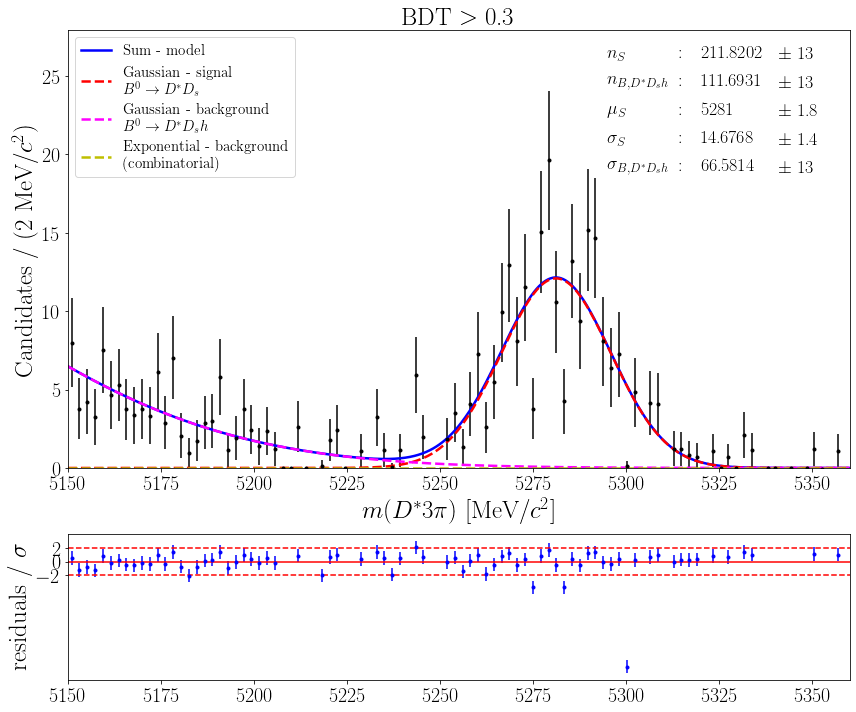

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.3.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


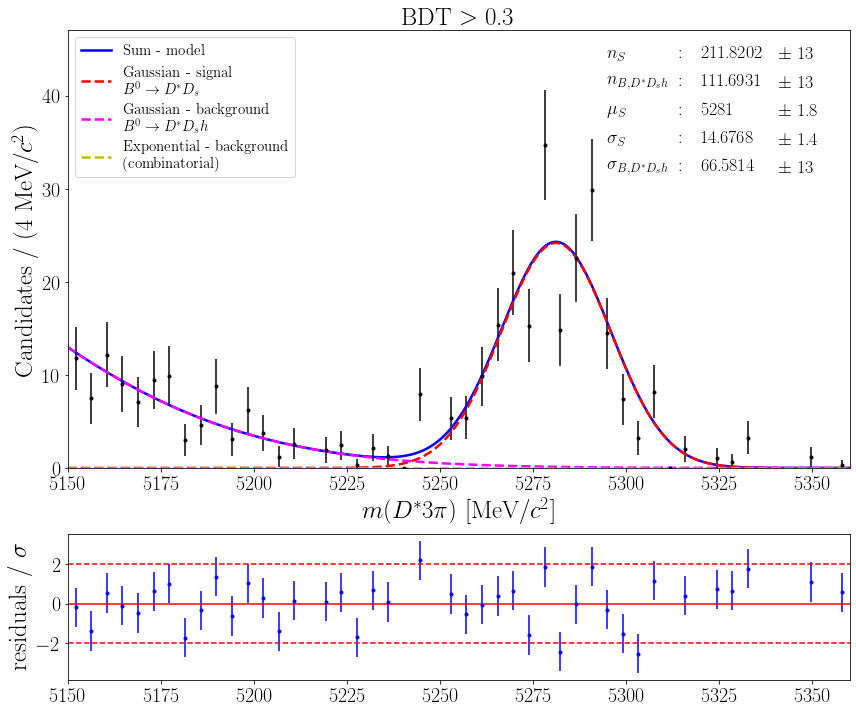

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.3.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.3_params.json


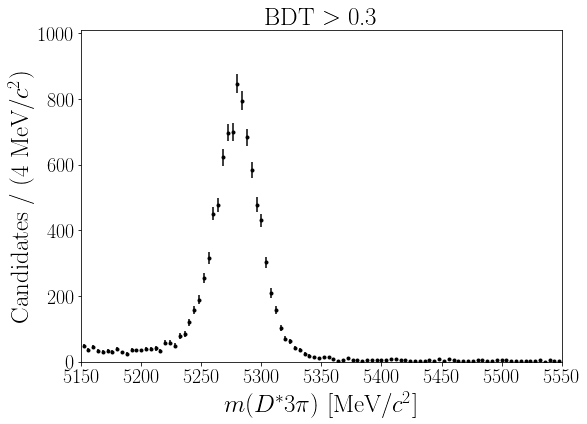

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.3.pdf
------------------------------------------------------------------
| FCN = -3.428e+04              |     Ncalls=303 (303 total)     |
| EDM = 0.000122 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name               value    minuit_hesse    at limit
-------------  ---------  --------------  ------

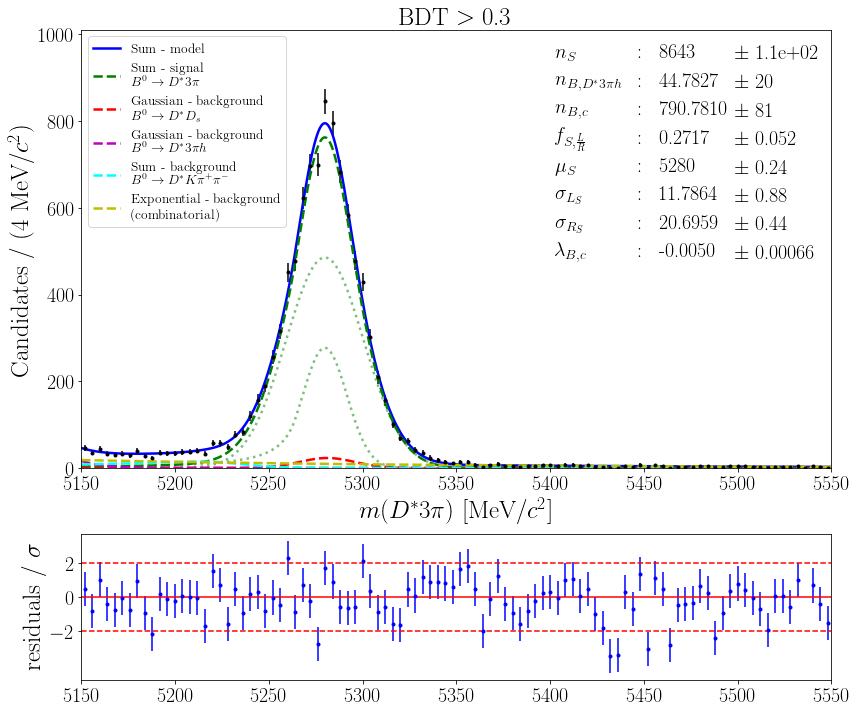

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.3.pdf


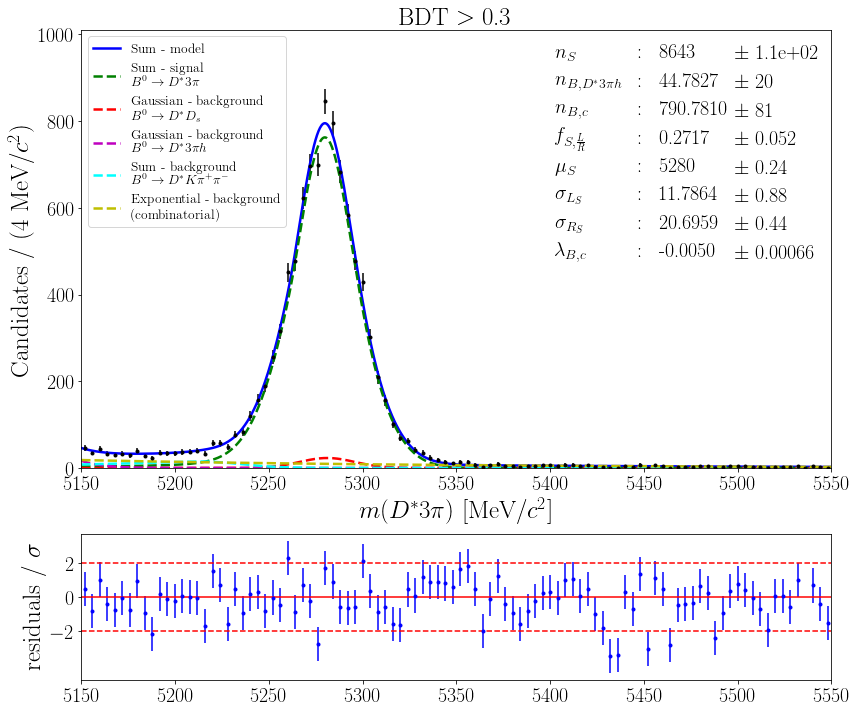

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.3.pdf
211.4962058113947 269.86427000412175
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.3_params.json
================================ cut_BDT = 0.325 ================================
cut_BDT_ref = 0.3
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.325.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


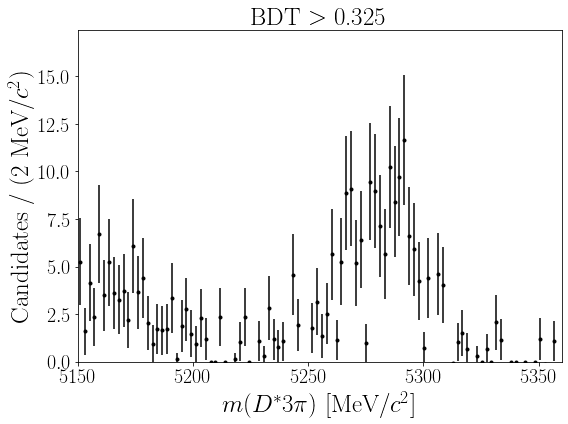

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.325.pdf
------------------------------------------------------------------
| FCN = 88.09                   |     Ncalls=156 (156 total)     |
| EDM = 1.86e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                    value    minuit_hesse    at limit
--------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.325       156     +/-      12       False
n_bkg2_B0Ds|BDT0.325    91.58     +/-      12       False
mu_B0Ds|BDT0.325         5281     +/-     2.4       False
sigma_B0Ds|BDT0.325     15.76     +/-     1.9       False
sigma2_B0Ds|BDT0.325    68.67     +/-      14       False
------------------------------------------------------------------
| FCN = 88.09                   |      Ncalls=66 (66 total)      |
| EDM = 6.76e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


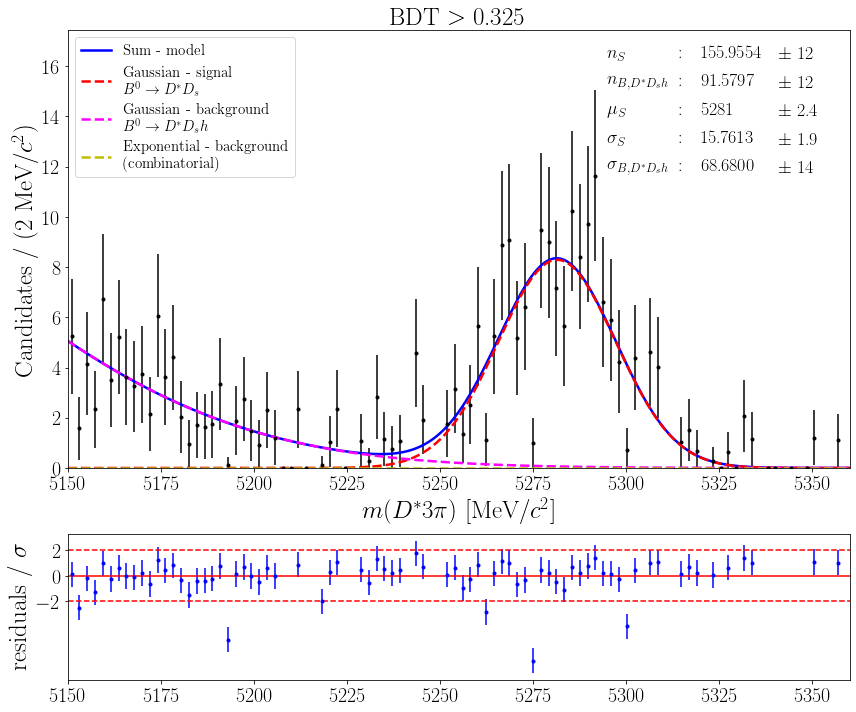

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.325.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


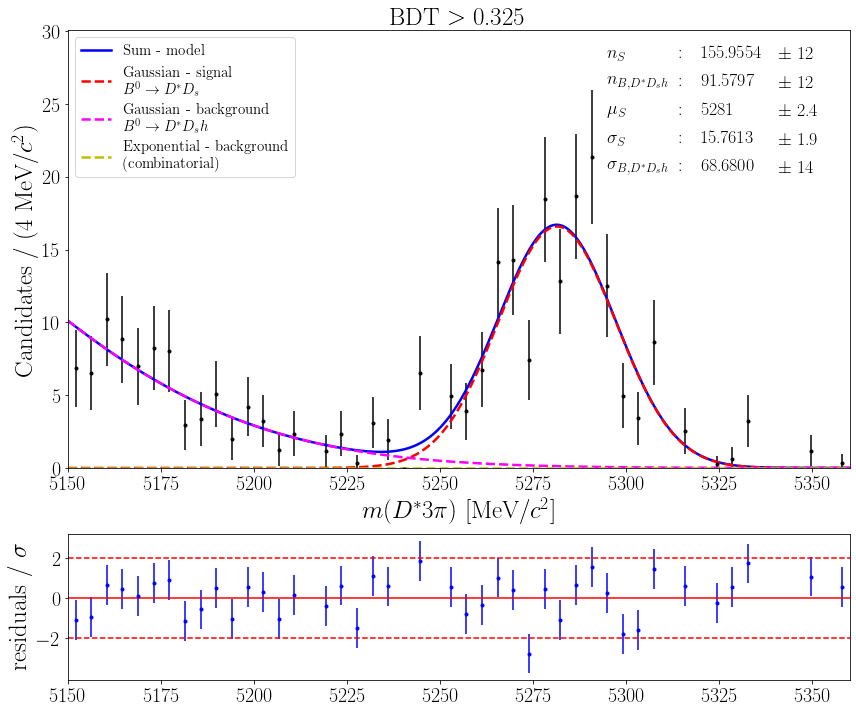

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.325.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.325_params.json


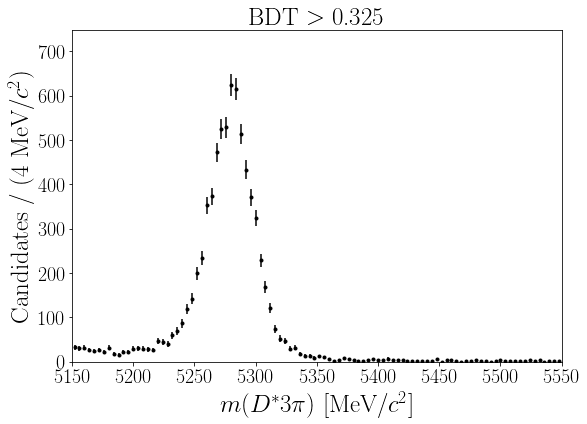

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.325.pdf
------------------------------------------------------------------
| FCN = -2.392e+04              |     Ncalls=302 (302 total)     |
| EDM = 0.00019 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                 value    minuit_hesse    at limit
---------------  ---------  --------------  

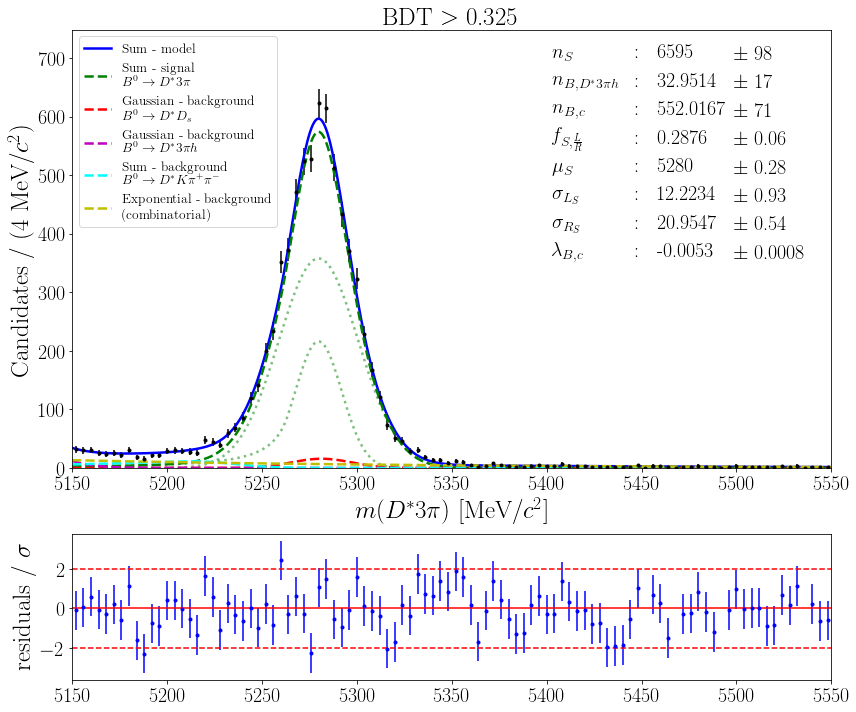

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.325.pdf


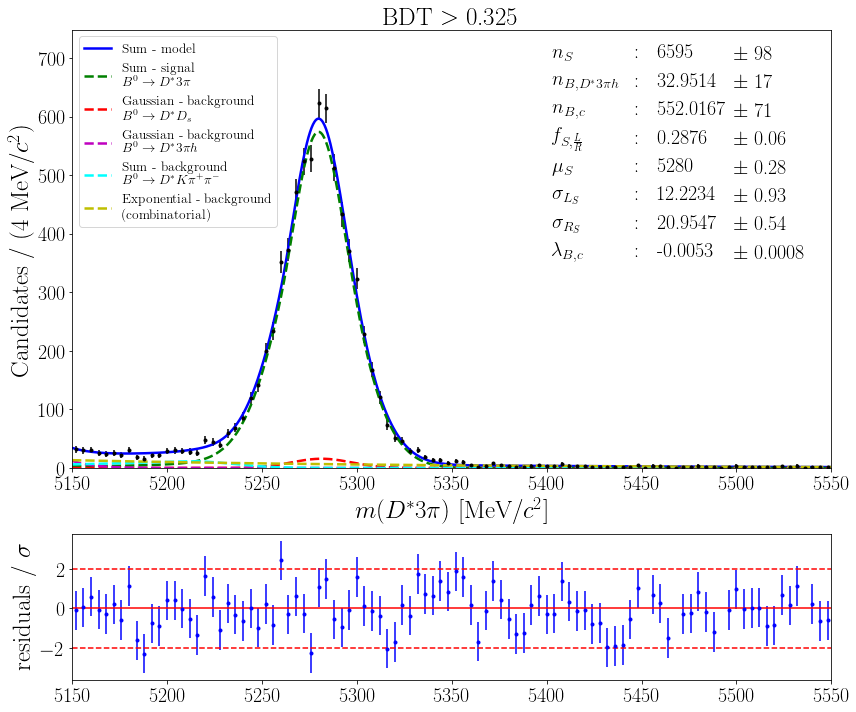

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.325.pdf
148.0821862758593 189.0733740238432
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.325_params.json
================================ cut_BDT = 0.35 ================================
cut_BDT_ref = 0.325
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.35.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


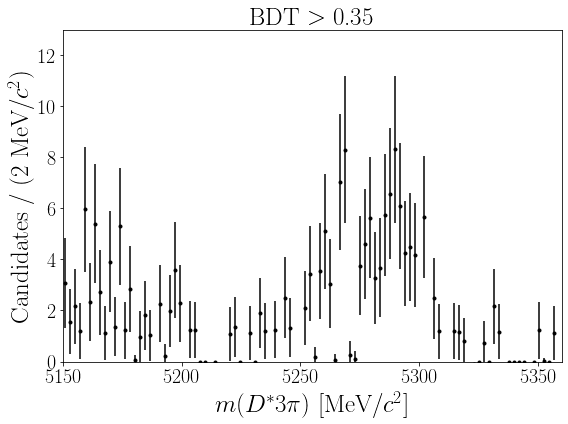

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.35.pdf
------------------------------------------------------------------
| FCN = 138                     |     Ncalls=148 (148 total)     |
| EDM = 0.000543 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                   value    minuit_hesse    at limit
-------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.35     106.6     +/-      20       False
n_bkg2_B0Ds|BDT0.35    61.24     +/-      20       False
mu_B0Ds|BDT0.35         5282     +/-     3.2       False
sigma_B0Ds|BDT0.35        17     +/- 0.00063        True
sigma2_B0Ds|BDT0.35    67.25     +/-      58       False
------------------------------------------------------------------
| FCN = 138                     |      Ncalls=66 (66 total)      |
| EDM = 8.35e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


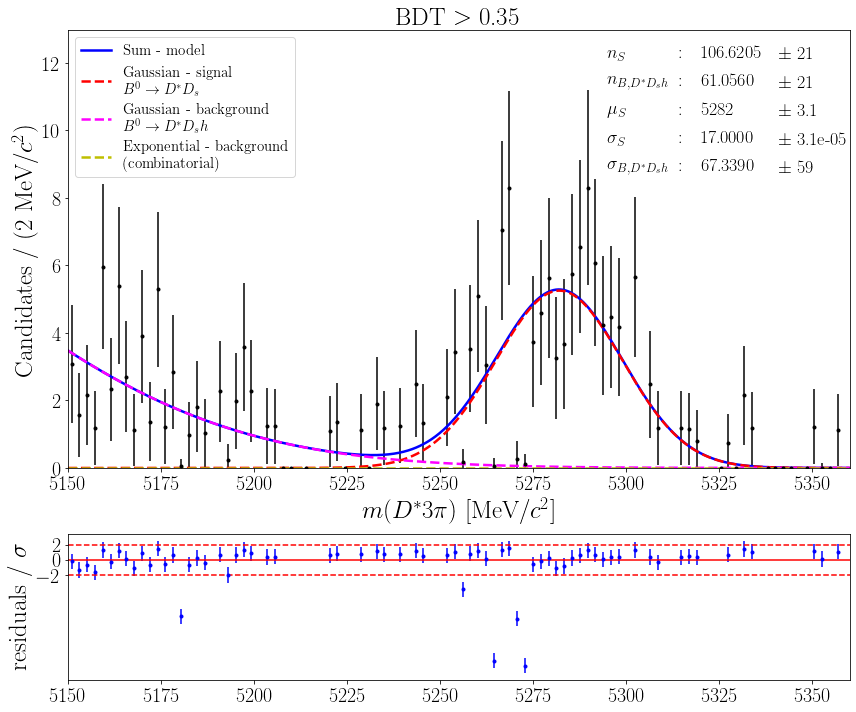

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.35.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


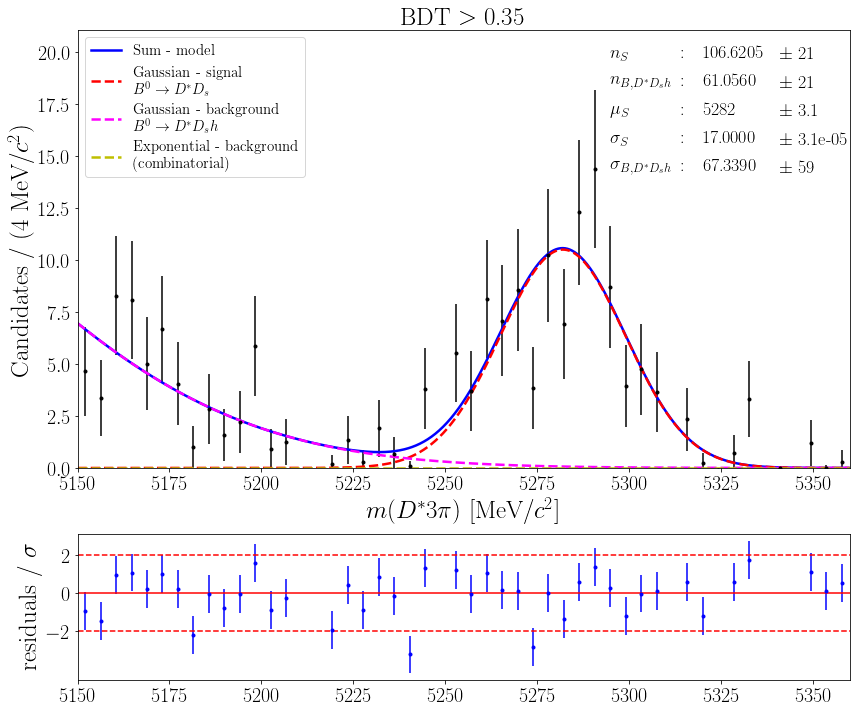

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.35.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.35_params.json


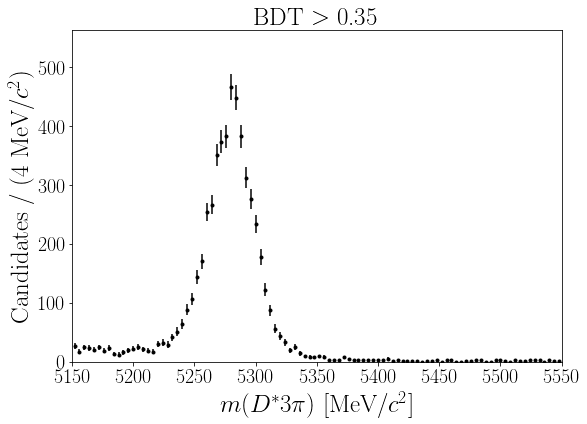

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.35.pdf
------------------------------------------------------------------
| FCN = -1.581e+04              |     Ncalls=310 (310 total)     |
| EDM = 6.86e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                value    minuit_hesse    at limit
--------------  ---------  --------------  ---

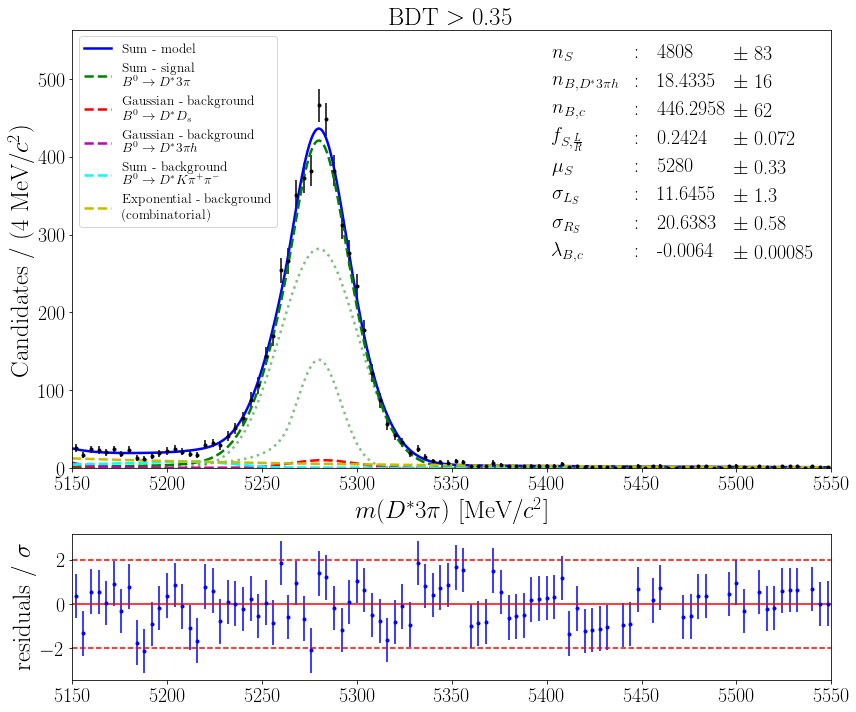

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.35.pdf


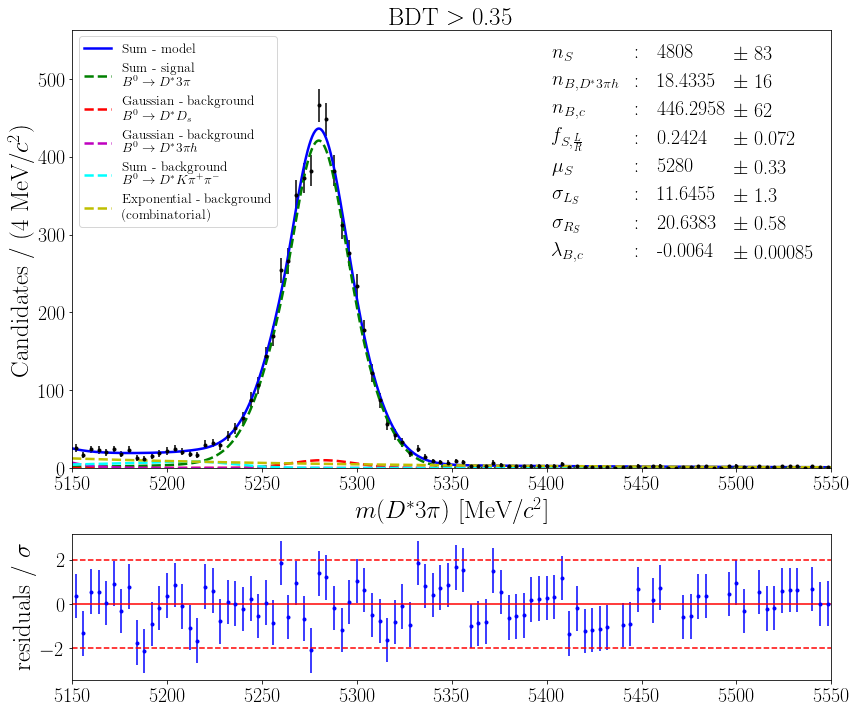

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.35.pdf
120.02891442577642 153.60994360138798
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.35_params.json
================================ cut_BDT = 0.375 ================================
cut_BDT_ref = 0.35
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common/common_B0toDstDs_BDT0.375.root


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


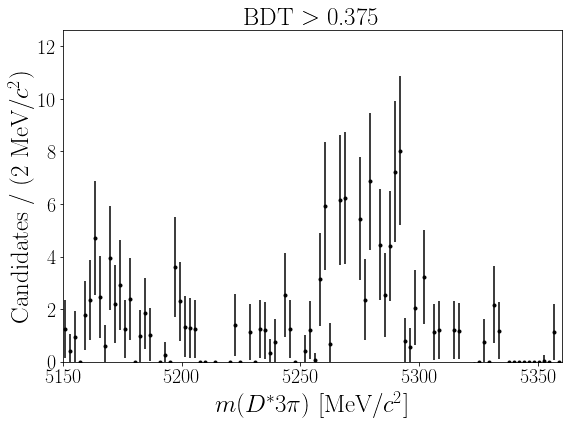

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.375.pdf
------------------------------------------------------------------
| FCN = 146.4                   |     Ncalls=176 (176 total)     |
| EDM = 1.54e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name                    value    minuit_hesse    at limit
--------------------  -------  --------------  ----------
n_sig_B0Ds|BDT0.375     71.89     +/-     7.8       False
n_bkg2_B0Ds|BDT0.375    47.13     +/-     7.8       False
mu_B0Ds|BDT0.375         5281     +/-     3.7       False
sigma_B0Ds|BDT0.375        17     +/- 8.3e-06        True
sigma2_B0Ds|BDT0.375       80     +/- 1.2e-05        True
------------------------------------------------------------------
| FCN = 146.4                   |      Ncalls=63 (63 total)      |
| EDM = 3.01e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | 

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


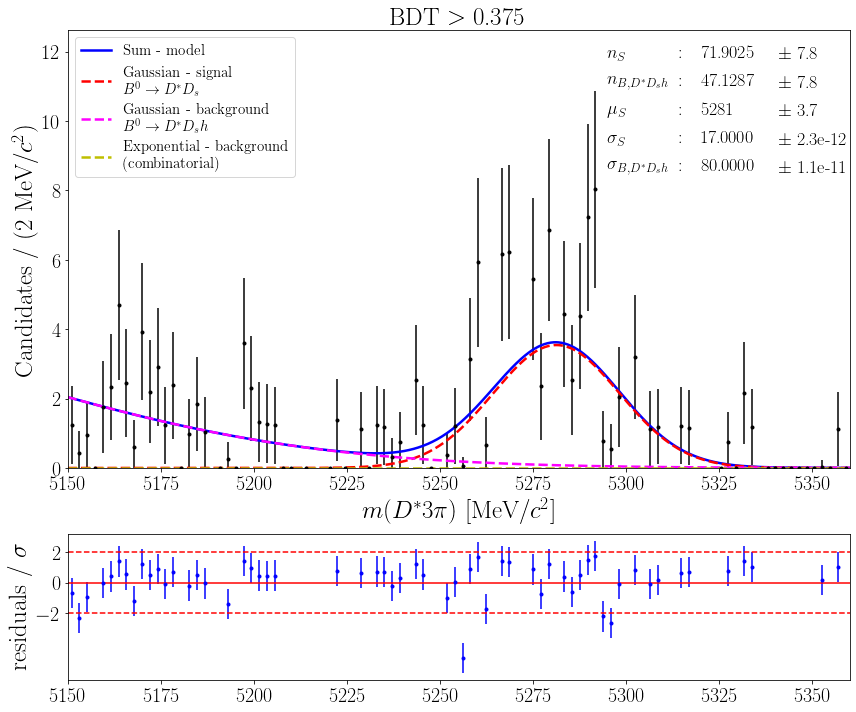

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.375.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/functions.py:634: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


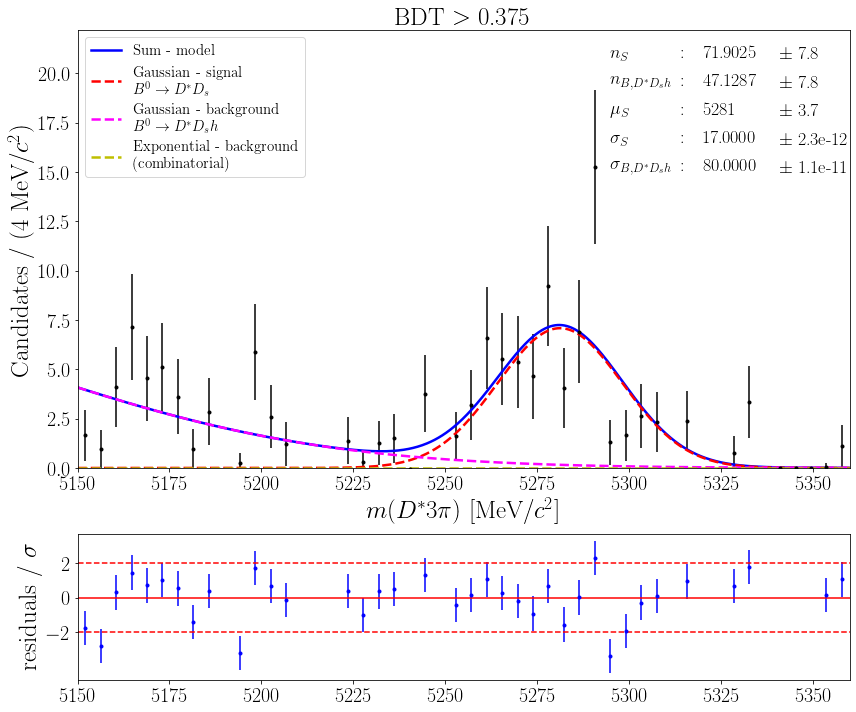

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_Ds_recomp_weighted_V8_fit_BDT0.375.pdf
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_Ds_recomp_weighted_V8_BDT0.375_params.json


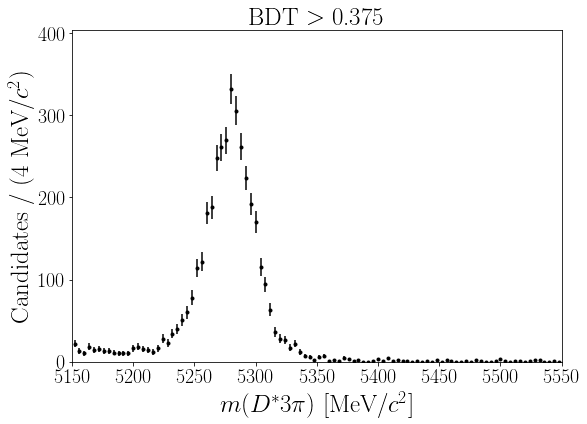

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_cutDeltaM_V8_rFixed_BDT0.375.pdf
------------------------------------------------------------------
| FCN = -9846                   |     Ncalls=321 (321 total)     |
| EDM = 0.000349 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                 value    minuit_hesse    at limit
---------------  ---------  --------------  

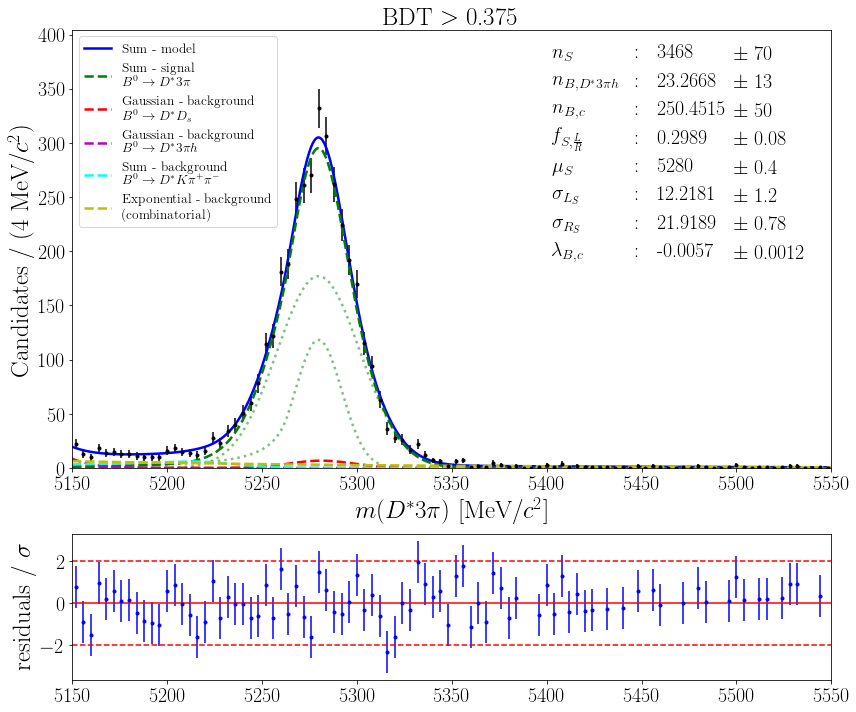

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_detail_fit_BDT0.375.pdf


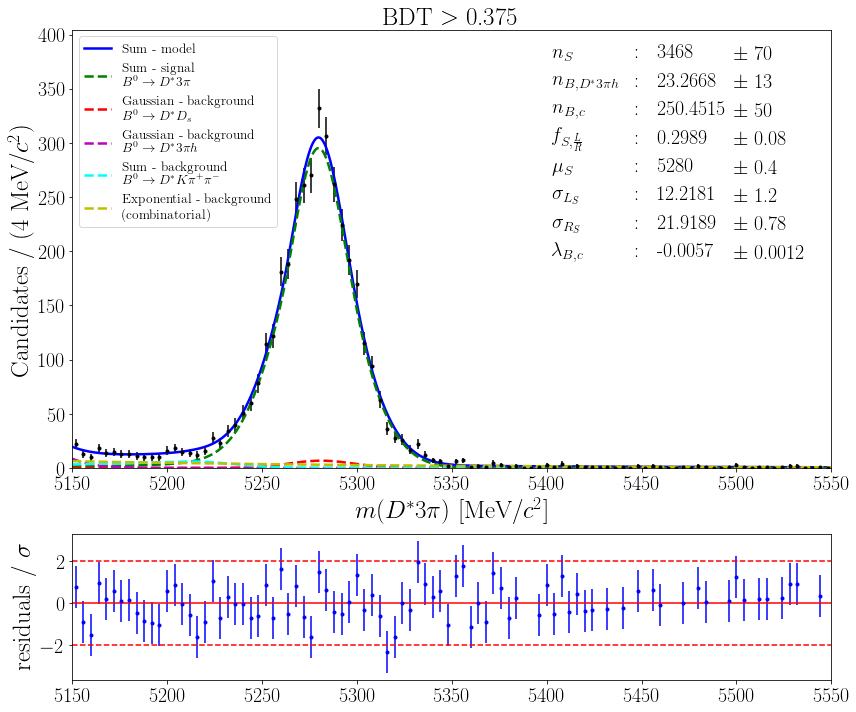

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/B0_M_common_cutDeltaM_V8_rFixed_fit_BDT0.375.pdf
67.31816681322316 86.0148848938581
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_cutDeltaM_V8_rFixed_BDT0.375_params.json


Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 3298.36
Info in negative or zero diagonal element in covariance matrix : i = 0
Info in added to diagonal of Error matrix a value : dg = 0.511285
Info: gdel = -156119


In [20]:
for cut_BDT, cut_BDT_ref in zip(l_BDT, l_BDT_ref):
    
    print(f"================================ cut_BDT = {cut_BDT} ================================")
    print(f"cut_BDT_ref = {cut_BDT_ref}")
    
    ### BDT CUT ========================================================
    k = str(cut_BDT)
    df = df_common.query(f"BDT > {cut_BDT}")
    df_Ds = fct.load_data(years, magnets, type_data='common', vars=['B0_M', 'BDT', 'sWeight'],
                            cut_DeltaM=True, cut_tau_Ds=True, cut_BDT=cut_BDT)
    
    ### cut_BDT_ref ====================================================
    if cut_BDT_ref is None:
        with open(f'{loc.JSON}/{name_full_common}_params.json', 'r') as f:
            params_r = json.load(f)
        with open(f'{loc.JSON}/all_common_cutDeltaM_Ds_weighted_V8_params.json', 'r') as f:
            B0Ds_params_r = json.load(f)    
    else:
        with open(f'{loc.JSON}/{name_data}_BDT{cut_BDT_ref}_params.json', 'r') as f:
            params_recup = json.load(f)

        params_r = format_previous_params(params_recup)

        with open(f'{loc.JSON}/{name_data_B0Ds}_BDT{cut_BDT_ref}_params.json', 'r') as f:
            B0Ds_params_recup = json.load(f)

        B0Ds_params_r = format_previous_params(B0Ds_params_recup)
    
    
    ### FIT ON WEIGHTED B0_M WITH  |tau_M-1969|<50 ====================
    ## Distribution ..........................
    fct.plot_hist_particle({name_data_B0Ds:df_Ds},'B0_M',
              low = low_B0Ds, high = high_B0Ds, cut_BDT = k,
              n_bins = 100, mode_hist = False, colors='black', weights=df_Ds['sWeight'])
    
    ## Starting point of the fit .............
    n_events_B0Ds = len(df_Ds.query(f'B0_M > {low_B0Ds} and B0_M < {high_B0Ds}'))

    if cut_BDT >= 0.175:
        initial_values_B0Ds = {
            # Signal
            'mu_B0Ds'       :{ 'value': B0Ds_params_r['mu_B0Ds']      , 'low': 5279.-4.       , 'high': 5279.+4.             , 'floating': True},
            'sigma_B0Ds'    :{ 'value': B0Ds_params_r['sigma_B0Ds']   , 'low': 15.-2.        , 'high': 15.+2.                , 'floating': True},
            'n_sig_B0Ds'    :{ 'value': n_sig_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
            # Combinatorial background
            'lambda_B0Ds'   :{ 'value': -0.001                        , 'low': -0.15          , 'high': -0.000000001         , 'floating': False},
            'n_bkg_B0Ds'    :{ 'value': 0                             , 'low': 0              , 'high': n_events_B0Ds        , 'floating': False},
            # Partially reconstructed particles
            'mu2_B0Ds'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
            'sigma2_B0Ds'   :{ 'value': B0Ds_params_r['sigma2_B0Ds']  , 'low': 30.            , 'high': 80.                  , 'floating': True},
            'n_bkg2_B0Ds'   :{ 'value': n_bkg2_k                      , 'low': 0.              , 'high': n_events_B0Ds        , 'floating': True},
        }
    
    else:   
        n_sig_k = B0Ds_params_r['n_sig_B0Ds']
        n_bkg_k = B0Ds_params_r['n_bkg_B0Ds']
        n_bkg2_k = B0Ds_params_r['n_bkg2_B0Ds']

        initial_values_B0Ds = {
            # Signal
            'mu_B0Ds'       :{ 'value': B0Ds_params_r['mu_B0Ds']      , 'low': 5279.-4.       , 'high': 5279.+4.             , 'floating': True},
            'sigma_B0Ds'    :{ 'value': B0Ds_params_r['sigma_B0Ds']   , 'low': 15.-5.        , 'high': 15.+5.                , 'floating': True},
            'n_sig_B0Ds'    :{ 'value': n_sig_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
            # Combinatorial background
            'lambda_B0Ds'   :{ 'value': B0Ds_params_r['lambda_B0Ds']  , 'low': -0.1           , 'high': -0.0000001           , 'floating': True},
            'n_bkg_B0Ds'    :{ 'value': n_bkg_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
            # Partially reconstructed particles
            'mu2_B0Ds'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
            'sigma2_B0Ds'   :{ 'value': B0Ds_params_r['sigma2_B0Ds']  , 'low': 50.            , 'high': 90.                  , 'floating': True},
            'n_bkg2_B0Ds'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
        }
    
    ## Observable and variables ...................
    
    obs_B0Ds = zfit.Space("x", limits=(low_B0Ds, high_B0Ds))

    zparams_B0Ds = {}
    for var in initial_values_B0Ds.keys():
        zparams_B0Ds[var] = zfit.Parameter(f"{var}|BDT{cut_BDT}",
                                          initial_values_B0Ds[var]['value'], 
                                          initial_values_B0Ds[var]['low'], 
                                          initial_values_B0Ds[var]['high'],
                                          floating = initial_values_B0Ds[var]['floating'])
    ## Name of the params .........................
    name_params_B0Ds = {
        # Signal
        f'mu_B0Ds|BDT{cut_BDT}'      : '$\mu_S$',
        f'sigma_B0Ds|BDT{cut_BDT}'   : '$\\sigma_S$',
        f'n_sig_B0Ds|BDT{cut_BDT}'   : '$n_S$',
        # Combinatorial background
        f'n_bkg_B0Ds|BDT{cut_BDT}'   : '$n_{B,c}$',
        f'lambda_B0Ds|BDT{cut_BDT}'  : '$\\lambda_{B,c}$',
        # Partially reconstructed background
        f'mu2_B0Ds|BDT{cut_BDT}'     : '$\\mu_{B, D^*3 D_s h}$',
        f'sigma2_B0Ds|BDT{cut_BDT}'  : '$\\sigma_{B, D^* D_s h}$',
        f'n_bkg2_B0Ds|BDT{cut_BDT}'  : '$n_{B, D^* D_s h}$',
    }
    
    ## PDFs .....................................
    gaussianS_B0Ds = zfit.pdf.Gauss(zparams_B0Ds[f'mu_B0Ds'],zparams_B0Ds['sigma_B0Ds'],obs=obs_B0Ds)
    exponential_B0Ds = zfit.pdf.Exponential(zparams_B0Ds['lambda_B0Ds'], obs=obs_B0Ds)
    gaussian_B0Ds = zfit.pdf.Gauss(zparams_B0Ds['mu2_B0Ds'],zparams_B0Ds['sigma2_B0Ds'],obs=obs_B0Ds)

    gaussianS_B0Ds_ext = gaussianS_B0Ds.create_extended(zparams_B0Ds['n_sig_B0Ds'])
    exponential_B0Ds_ext = exponential_B0Ds.create_extended(zparams_B0Ds['n_bkg_B0Ds'])
    gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams_B0Ds['n_bkg2_B0Ds'])

    model_B0Ds = zfit.pdf.SumPDF([gaussianS_B0Ds_ext, exponential_B0Ds_ext, gaussian_B0Ds_ext])
    data_B0Ds = zfit.Data.from_pandas(df_Ds['B0_M'], obs=obs_B0Ds, weights=df_Ds['sWeight']) 
    
    ## Do the fit ...............................
    start = timeit.default_timer()
    result_B0Ds, params_B0Ds = launch_fit( model_B0Ds, data_B0Ds, extended=True)
    result_B0Ds, params_B0Ds = launch_fit( model_B0Ds, data_B0Ds, extended=True)
    stop = timeit.default_timer()
    print('Time to do the fit: ', stop - start)     
    
    ## Plot and save the fit ....................
    name_data_B0Ds_plot = name_data_B0Ds
    plot_hist_fit_particle(df_Ds,'B0_M', models = [model_B0Ds, gaussianS_B0Ds_ext, gaussian_B0Ds_ext, exponential_B0Ds_ext],
                           name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                          '\n (combinatorial)'], cut_BDT=k,
                           obs=obs_B0Ds, n_bins = 100,mode_hist = False,
                           name_data = name_data_B0Ds, name_folder=name_data,
                           colors=['b','r','magenta','y'], weights=df_Ds['sWeight'],
                           params=params_B0Ds,name_params=name_params_B0Ds,
                           colWidths=[0.05,0.01,0.05,0.04],
                           fontsize_res = 18.,
                           fontsize_leg=15)

    n_bins=50
    name_data_B0Ds_plot = name_data_B0Ds+str(n_bins)

    plot_hist_fit_particle(df_Ds,'B0_M', models = [model_B0Ds, gaussianS_B0Ds_ext, gaussian_B0Ds_ext, exponential_B0Ds_ext],
                           name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                          '\n (combinatorial)'], cut_BDT=k,
                           obs=obs_B0Ds, n_bins = n_bins,mode_hist = False,
                           name_data = name_data_B0Ds, name_folder=name_data,
                           colors=['b','r','magenta','y'], weights=df_Ds['sWeight'],
                           params=params_B0Ds,name_params=name_params_B0Ds,
                           colWidths=[0.05,0.01,0.05,0.04],
                           fontsize_res = 18.,
                           fontsize_leg=15)
    save_params(params_B0Ds, name_data_B0Ds+f'_BDT{cut_BDT}', True)
    
    
    ### FIT ON WEIGHTED B0_M WITH  |tau_M-1969|<50 ====================
    ## Distribution ............................
    fct.plot_hist_particle({name_data:df},'B0_M',
              low = low, high = high, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False, colors='black')
    
    

    ## Load data ...............................
    #  Result of the fit on the MC D0S->D*pipipi data with one of the pi misidentified as a kaon
    with open(f'{loc.JSON}/data_KPiPi_2_params.json', 'r') as f:
        data_KPiPi_params = json.load(f)

    for var in 'muL', 'muR', 'sigmaL', 'sigmaR': # conversion GeV -> MeV
        data_KPiPi_params[var] = data_KPiPi_params[var]*1000
        data_KPiPi_params[f"{var}_err"] = data_KPiPi_params[f"{var}_err"]*1000    

    # Result of the previous fit on the B0_M sWeighted distribution with cut on tau_M around m(Ds)
    with open(f'{loc.JSON}/{name_data_B0Ds}_BDT{cut_BDT}_params.json', 'r') as f:
        data_B0Ds_params = json.load(f)

    # Result of the fit on the MC signal data
    with open(f'{loc.JSON}/MC_params.json', 'r') as f:
        MC_param_results = json.load(f)
    
    ## Starting point of the fit ...............
    n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))

    n_sig_k = params_r['n_sig']
    n_bkg_k = params_r['n_bkg']
    n_bkg2_k = params_r['n_bkg2']
    
    if cut_BDT >= 0.2:
        with open(f'{loc.JSON}/{name_data}_BDT-0.15_params.json', 'r') as f:
            sigma2 = json.load(f)['sigma2|BDT-0.15']

        initial_values = {
            # Signal        
            'mu'       :{ 'value': params_r['mu']                , 'low': 5279.-5.       , 'high': 5279.+5.             , 'floating': True},
            'sigmaL'   :{ 'value': params_r['sigmaL']            , 'low': 17.-15.        , 'high': 17.+15.              , 'floating': True},
            'sigmaR'   :{ 'value': params_r['sigmaR']            , 'low': 17.-15.        , 'high': 17+15.               , 'floating': True},
            'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': False},
            'alphaR'   :{ 'value': -MC_param_results['alphaR_MC'], 'low': -10.            , 'high': -0.1                , 'floating': False},
            'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 200.                 , 'floating': False},
            'nR'       :{ 'value': MC_param_results['nR_MC']     , 'low': 1.             , 'high': 200.                 , 'floating': False},
            'frac'     :{ 'value': params_r['frac']              , 'low': 0.1              , 'high': 1.                 , 'floating': True},
            'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
            # Combinatorial background        
            'lambda'   :{ 'value': params_r['lambda']            , 'low': -0.01          , 'high': -0.00001             , 'floating': True},
            'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
            # Partially reconstructed particles        
            'mu2'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
            'sigma2'   :{ 'value': sigma2                        , 'low': 10.            , 'high': 5150.-mu2_p          , 'floating': False},
            'n_bkg2'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
            # Background decay D*Kpipi    
        #     'n_bkgK'   :{ 'value': n_bkgK_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
            'r_bkgK'   :{ 'value': r_bkgK                        , 'low': 0.0001          , 'high': 0.5                   , 'floating': False},
        }
    else:

        initial_values = {
            # Signal        
            'mu'       :{ 'value': params_r['mu']                , 'low': 5279.-5.       , 'high': 5279.+5.             , 'floating': True},
            'sigmaL'   :{ 'value': params_r['sigmaL']            , 'low': 17.-15.        , 'high': 17.+15.              , 'floating': True},
            'sigmaR'   :{ 'value': params_r['sigmaR']            , 'low': 17.-15.        , 'high': 17+15.               , 'floating': True},
            'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': False},
            'alphaR'   :{ 'value': -MC_param_results['alphaR_MC'], 'low': -10.            , 'high': -0.1                , 'floating': False},
            'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 200.                 , 'floating': False},
            'nR'       :{ 'value': MC_param_results['nR_MC']     , 'low': 1.             , 'high': 200.                 , 'floating': False},
            'frac'     :{ 'value': params_r['frac']              , 'low': 0.1              , 'high': 1.                 , 'floating': True},
            'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
            # Combinatorial background        
            'lambda'   :{ 'value': params_r['lambda']            , 'low': -0.01          , 'high': -0.00001             , 'floating': True},
            'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
            # Partially reconstructed particles        
            'mu2'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
            'sigma2'   :{ 'value': params_r['sigma2']            , 'low': 10.            , 'high': 5150.-mu2_p          , 'floating': True},
            'n_bkg2'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
            # Background decay D*Kpipi    
        #     'n_bkgK'   :{ 'value': n_bkgK_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
            'r_bkgK'   :{ 'value': r_bkgK                        , 'low': 0.0001          , 'high': 0.5                   , 'floating': False},
        }
    
    for var in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
        initial_values[f'{var}_K'] = {'value': data_KPiPi_params[var], 'low': None, 'high': None, 'floating': False}

    for var in 'mu', 'sigma', 'n_sig' :
        initial_values[f'{var}_Ds'] = {'value': data_B0Ds_params[f'{var}_B0Ds|BDT{cut_BDT}'], 'low': None, 'high': None, 'floating': False}

    ## Observable and variables .................
    obs = zfit.Space("x", limits=(low, high))

    zparams = {}
    for var in initial_values.keys():
        zparams[var] = zfit.Parameter(f"{var}|BDT{cut_BDT}",
                                      initial_values[var]['value'], 
                                      initial_values[var]['low'], 
                                      initial_values[var]['high'],
                                      floating = initial_values[var]['floating'])


    mult = lambda r, n: r*n
    zparams["n_bkgK"] = zfit.ComposedParameter(f"n_bkgK|BDT{cut_BDT}", mult, params=[zparams['r_bkgK'],zparams['n_sig']])    

    ## Name of the params .......................
    name_params = {
        # Signal
        f'mu|BDT{cut_BDT}'      : '$\mu_S$',
        f'sigmaL|BDT{cut_BDT}'  : '$\\sigma_{L_S}$',
        f'sigmaR|BDT{cut_BDT}'  : '$\\sigma_{R_S}$',    
        f'alphaL|BDT{cut_BDT}'  : '$\\alpha_{L_S}$',
        f'alphaR|BDT{cut_BDT}'  : '$\\alpha_{R_S}$',
        f'nL|BDT{cut_BDT}'      : '$n_L_S$',
        f'nR|BDT{cut_BDT}'      : '$n_R_S$',
        f'frac|BDT{cut_BDT}'    : '$f_{S, \\frac{L}{R}}$',
        f'n_sig|BDT{cut_BDT}'   : '$n_S$',
        # Combinatorial background
        f'n_bkg|BDT{cut_BDT}'   : '$n_{B,c}$',
        f'lambda|BDT{cut_BDT}'  : '$\\lambda_{B,c}$',
        # Partially reconstructed brackground
        f'mu2|BDT{cut_BDT}'     : '$\\mu_{B,D^*3\pi h}$',
        f'sigma2|BDT{cut_BDT}'  : '$\\sigma_{B,D^*3\pi h}$',
        f'n_bkg2|BDT{cut_BDT}'  : '$n_{B,D^*3\pi h}$',
        # Background decay D*Kpipi    
        f'n_bkgK|BDT{cut_BDT}'  : '$n_{B,D^*K\pi\pi}$',
        f'r_bkgK|BDT{cut_BDT}'  : '$\\frac{n_{B,D^*K\pi\pi}}{n_S}$',
    }
    
    ## PDFs .....................................
    model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                              zparams['sigmaL'], zparams['sigmaR'],
                                                              zparams['frac'], obs,                                                          
                                                              zparams['alphaL'], zparams['alphaR'], 
                                                              zparams['nL'], zparams['nR']
                                                             )


    gaussian_B0Ds = zfit.pdf.Gauss(zparams['mu_Ds'],zparams['sigma_Ds'],obs=obs)

    model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                              zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                              zparams['fraction_K'], obs,
                                                              zparams['alphaL_K'], zparams['alphaR_K'], 
                                                              zparams['nL_K'], zparams['nR_K'])

    exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
    gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)


    model_S_ext = model_S.create_extended(zparams['n_sig'])
    exp_ext = exponential.create_extended(zparams['n_bkg'])
    gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
    gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams['n_sig_Ds'])
    model_K_ext = model_K.create_extended(zparams['n_bkgK'])

    model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext, exp_ext]) # gauss is folded by frac
    data = zfit.Data.from_pandas(df['B0_M'], obs=obs)
    
    ## Do the fit ...............................
    start = timeit.default_timer()
    result, params = launch_fit(model, data, extended=True)
    result, params = launch_fit(model, data, extended=True)
    stop = timeit.default_timer()
    print('Time to do the fit: ', stop - start) 
    
    ## Plot and save the fit ....................
    name_data_plot = name_data + '_detail'
    plot_hist_fit_particle(df,'B0_M', models = [model,[model_S_ext, crystalBallL_S, crystalBallR_S], gaussian_B0Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                           name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                          '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                           cut_BDT=cut_BDT,
                           obs=obs, n_bins = 100,mode_hist = False,
                           name_data = name_data_plot, name_folder=name_data,
                           colors=['b','g','r','m','cyan','y'],
                           params=params,name_params=name_params,
                           fontsize_leg=13.5,
                           colWidths=[0.06,0.01,0.05,0.06]
                          )
    name_data_plot = name_data
    plot_hist_fit_particle(df,'B0_M', models = [model,model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                           name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                          '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                           cut_BDT=cut_BDT,
                           obs=obs, n_bins = 100,mode_hist = False,
                           name_data = name_data_plot, name_folder=name_data,
                           colors=['b','g','r','m','cyan','y'],
                           params=params,name_params=name_params,
                           fontsize_leg=13.5,
                           colWidths=[0.06,0.01,0.05,0.06])
    
    ## Number of combi background events under the signal peak ...
    integral = float(exp_ext.analytic_integrate([mea-3*sigm, mea+3*sigm]))
    integral2 = float(exp_ext.analytic_integrate([mea-3*sigm2, mea+3*sigm2]))

    n_bkg = float(zparams['n_bkg'].value())
    n_bkg_err = params[zparams['n_bkg']]['minuit_hesse']['error']
    n_B = integral * n_bkg
    n_B_err = integral * n_bkg_err

    n_B2 = integral2 * n_bkg
    n_B2_err = integral2 * n_bkg_err
    print(n_B, n_B2)
    save_params(params,name_data + f"_BDT{cut_BDT}", True, {'n_B':n_B, 'n_B_err':n_B_err, 'n_B2':n_B2, 'n_B2_err':n_B2_err})